In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\OMAH\OneDrive\Documents\Desktop\SupermarketSales.csv")

In [3]:
df

,Segment,State,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Date
0,Corporate,Texas,Stationery,High,38,352.46,396.40,2023-06-13
1,Home Office,California,Electronics,Medium,26,25.35,107.33,2023-02-26
2,Corporate,New York,Furniture,Low,6,63.93,112.22,2023-03-14
3,Corporate,New York,Groceries,Low,31,442.14,452.77,2023-06-19
4,Corporate,Texas,Groceries,Medium,39,21.47,108.79,2023-08-07
...,...,...,...,...,...,...,...,...
695,Consumer,New York,Groceries,Medium,43,252.21,293.42,2023-04-17
696,Home Office,Texas,Groceries,Low,13,252.47,289.67,2023-12-06
697,Corporate,New York,Stationery,High,14,433.58,497.39,2023-03-25
698,Corporate,California,Clothing,Medium,21,436.00,530.89,2023-12-15


In [4]:
df.dtypes

Segment                 object
State                   object
Product                 object
Discount Band           object
Units Sold               int64
Manufacturing Price    float64
Sale Price             float64
Date                    object
dtype: object

In [5]:
df['Units Sold'] = df['Units Sold'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Segment                        object
State                          object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Date                   datetime64[ns]
dtype: object

In [7]:
df.isnull().sum()

Segment                0
State                  0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Date                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [10]:
df

,Segment,State,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Date,Year,Month,Day
0,Corporate,Texas,Stationery,High,38.0,352.46,396.40,2023-06-13,2023,June,Tuesday
1,Home Office,California,Electronics,Medium,26.0,25.35,107.33,2023-02-26,2023,February,Sunday
2,Corporate,New York,Furniture,Low,6.0,63.93,112.22,2023-03-14,2023,March,Tuesday
3,Corporate,New York,Groceries,Low,31.0,442.14,452.77,2023-06-19,2023,June,Monday
4,Corporate,Texas,Groceries,Medium,39.0,21.47,108.79,2023-08-07,2023,August,Monday
...,...,...,...,...,...,...,...,...,...,...,...
695,Consumer,New York,Groceries,Medium,43.0,252.21,293.42,2023-04-17,2023,April,Monday
696,Home Office,Texas,Groceries,Low,13.0,252.47,289.67,2023-12-06,2023,December,Wednesday
697,Corporate,New York,Stationery,High,14.0,433.58,497.39,2023-03-25,2023,March,Saturday
698,Corporate,California,Clothing,Medium,21.0,436.00,530.89,2023-12-15,2023,December,Friday


In [11]:
df['Month'] = df['Month'].astype(str)

In [12]:
df.dtypes

Segment                        object
State                          object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Date                   datetime64[ns]
Year                            int64
Month                          object
Day                            object
dtype: object

In [13]:
#Which product category is the most sold across all states?
product_units_sold = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
product_units_sold

Product
Groceries      3886.0
Stationery     3847.0
Clothing       3588.0
Electronics    3383.0
Furniture      3139.0
Name: Units Sold, dtype: float64

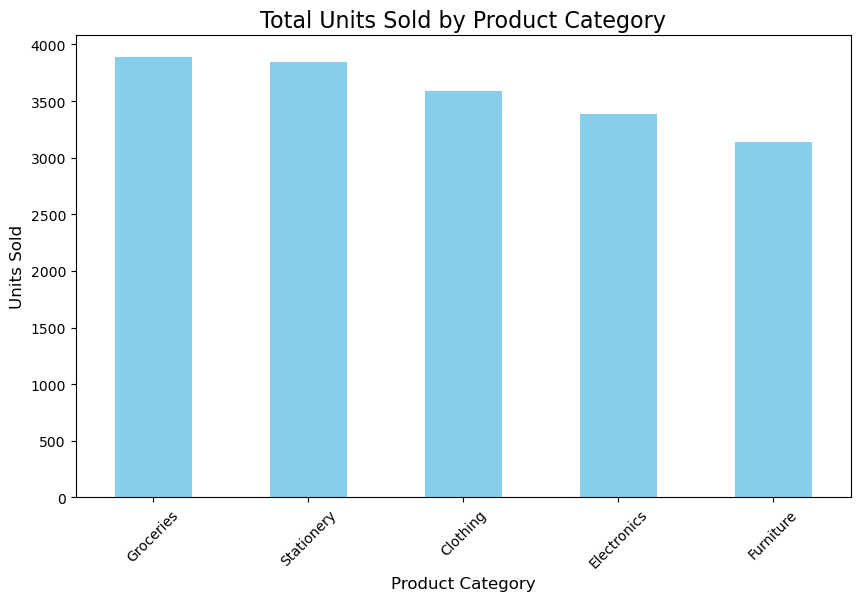

In [14]:
plt.figure(figsize=(10,6))
product_units_sold.plot(kind='bar', color='skyblue')
plt.title('Total Units Sold by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
#Total sales revenue by each state
total_products = df.groupby('State')['Sale Price'].sum()
total_products

State
California    36724.82
Florida       42637.18
Illinois      39676.43
New York      45188.63
Texas         49756.59
Name: Sale Price, dtype: float64

In [16]:
df.dtypes

Segment                        object
State                          object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Date                   datetime64[ns]
Year                            int64
Month                          object
Day                            object
dtype: object

In [17]:
df['Total revenue'] =df['Units Sold'] * df['Sale Price']
df

,Segment,State,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Date,Year,Month,Day,Total revenue
0,Corporate,Texas,Stationery,High,38.0,352.46,396.40,2023-06-13,2023,June,Tuesday,15063.20
1,Home Office,California,Electronics,Medium,26.0,25.35,107.33,2023-02-26,2023,February,Sunday,2790.58
2,Corporate,New York,Furniture,Low,6.0,63.93,112.22,2023-03-14,2023,March,Tuesday,673.32
3,Corporate,New York,Groceries,Low,31.0,442.14,452.77,2023-06-19,2023,June,Monday,14035.87
4,Corporate,Texas,Groceries,Medium,39.0,21.47,108.79,2023-08-07,2023,August,Monday,4242.81
...,...,...,...,...,...,...,...,...,...,...,...,...
695,Consumer,New York,Groceries,Medium,43.0,252.21,293.42,2023-04-17,2023,April,Monday,12617.06
696,Home Office,Texas,Groceries,Low,13.0,252.47,289.67,2023-12-06,2023,December,Wednesday,3765.71
697,Corporate,New York,Stationery,High,14.0,433.58,497.39,2023-03-25,2023,March,Saturday,6963.46
698,Corporate,California,Clothing,Medium,21.0,436.00,530.89,2023-12-15,2023,December,Friday,11148.69


In [18]:
#Total sales revenue by each state
total_products = df.groupby('State')['Total revenue'].sum().reset_index()
total_products.sort_values(by='Total revenue', ascending=False)

,State,Total revenue
4,Texas,1334705.48
3,New York,1097257.79
2,Illinois,1045167.22
1,Florida,1002389.09
0,California,935247.63


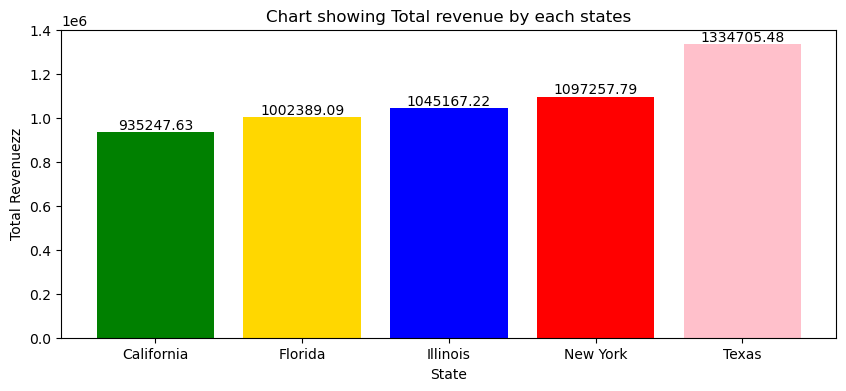

In [19]:
plt.figure(figsize=(10,4))
plt.bar(total_products['State'], total_products['Total revenue'], color= ['green', 'gold', 'blue', 'red', 'pink', 'yellow', 'brown'])
for index, value in enumerate(total_products['Total revenue']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('State')
plt.ylabel('Total Revenuezz')
plt.title('Chart showing Total revenue by each states')
plt.show()

In [20]:
#How do sales trends vary by month or season?
monthly_sales_trend = df.groupby('Month')['Total revenue'].sum()
monthly_sales_trend

Month
April        563197.79
August       400974.39
December     458928.80
February     378173.71
January      519767.15
July         344555.68
June         478090.37
March        604242.59
May          461497.02
November     397724.01
October      352863.24
September    454752.46
Name: Total revenue, dtype: float64

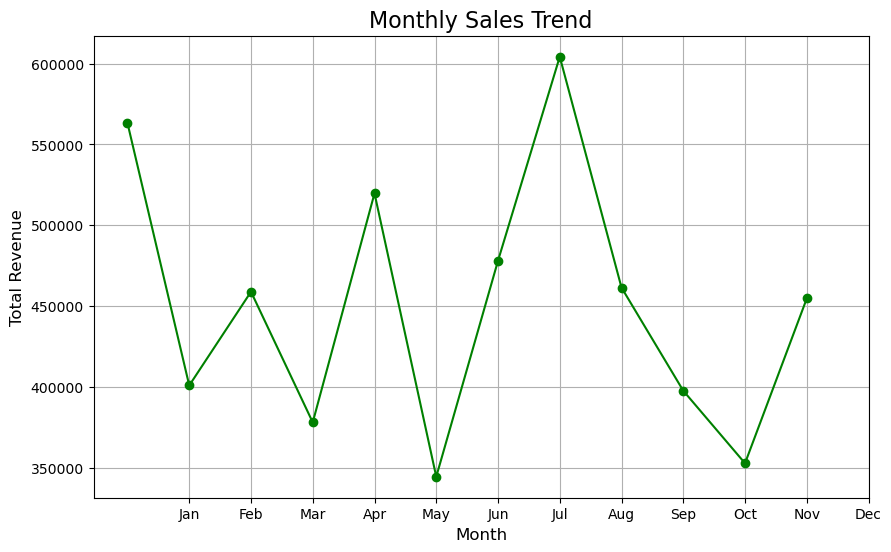

In [21]:
plt.figure(figsize=(10, 6))
monthly_sales_trend.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

In [22]:
#Which customer segment generates the most revenue?
segment_revenue = df.groupby('Segment')['Total revenue'].sum().sort_values(ascending=False)
segment_revenue

Segment
Consumer       1929341.80
Home Office    1822303.54
Corporate      1663121.87
Name: Total revenue, dtype: float64

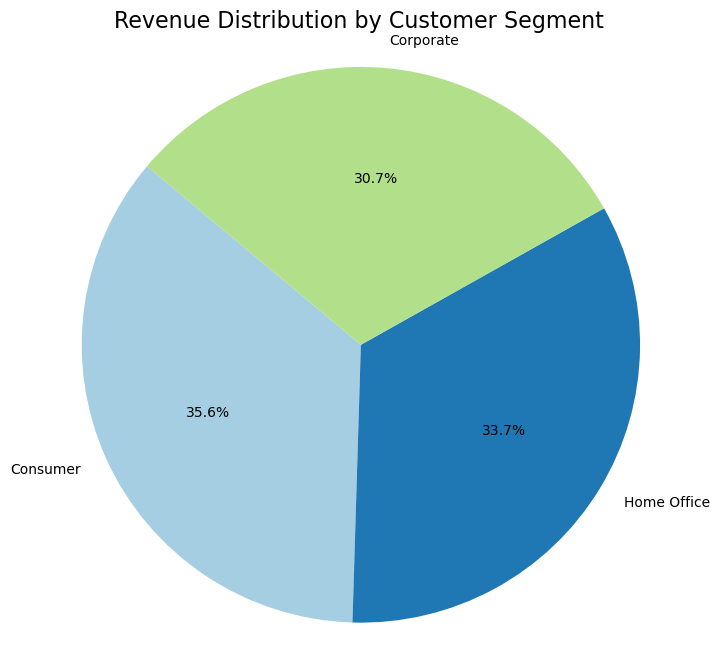

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(segment_revenue, labels=segment_revenue.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Customer Segment', fontsize=16)
plt.axis('equal')
plt.show()

In [26]:
df

,Segment,State,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Date,Year,Month,Day,Total revenue
0,Corporate,Texas,Stationery,High,38.0,352.46,396.40,2023-06-13,2023,June,Tuesday,15063.20
1,Home Office,California,Electronics,Medium,26.0,25.35,107.33,2023-02-26,2023,February,Sunday,2790.58
2,Corporate,New York,Furniture,Low,6.0,63.93,112.22,2023-03-14,2023,March,Tuesday,673.32
3,Corporate,New York,Groceries,Low,31.0,442.14,452.77,2023-06-19,2023,June,Monday,14035.87
4,Corporate,Texas,Groceries,Medium,39.0,21.47,108.79,2023-08-07,2023,August,Monday,4242.81
...,...,...,...,...,...,...,...,...,...,...,...,...
695,Consumer,New York,Groceries,Medium,43.0,252.21,293.42,2023-04-17,2023,April,Monday,12617.06
696,Home Office,Texas,Groceries,Low,13.0,252.47,289.67,2023-12-06,2023,December,Wednesday,3765.71
697,Corporate,New York,Stationery,High,14.0,433.58,497.39,2023-03-25,2023,March,Saturday,6963.46
698,Corporate,California,Clothing,Medium,21.0,436.00,530.89,2023-12-15,2023,December,Friday,11148.69


In [27]:
#Calculating the total discount given by each state
df['Discount'] = (df['Manufacturing Price'] - df['Sale Price']) * df['Units Sold']
state_discount = df.groupby('State')['Discount'].sum()
state_discount

State
California   -184297.21
Florida      -197633.80
Illinois     -178511.25
New York     -215918.16
Texas        -228222.59
Name: Discount, dtype: float64

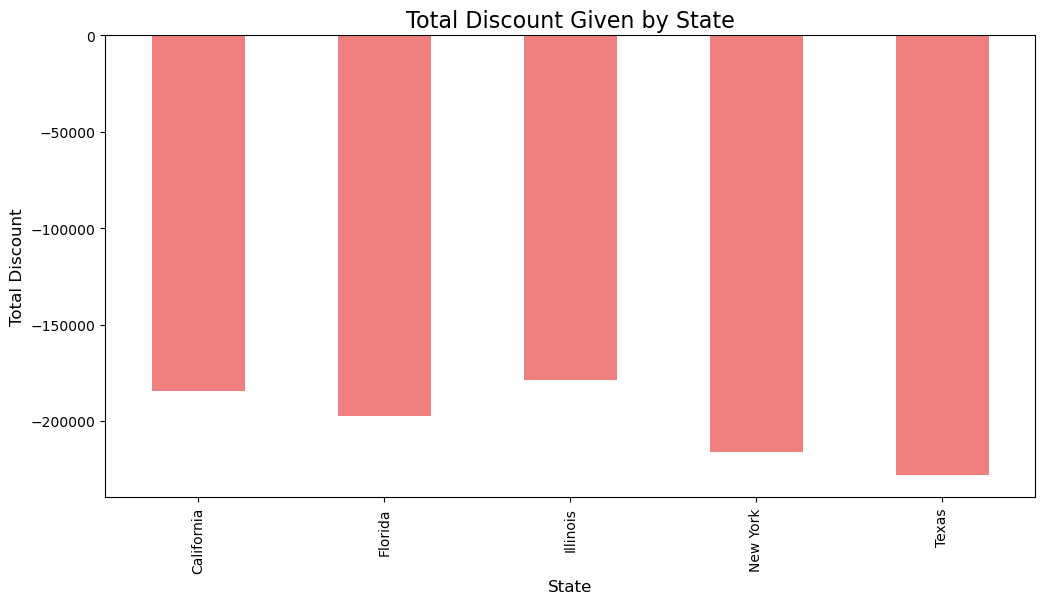

In [28]:
plt.figure(figsize=(12, 6))
state_discount.plot(kind='bar', color='lightcoral')
plt.title('Total Discount Given by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Discount', fontsize=12)
plt.show()

In [29]:
#show the distribution of the SalePrice against each state accross each product
product_sale_by_state = df.groupby(['State', 'Product'])['Sale Price'].sum().reset_index()
product_sale_by_state

,State,Product,Sale Price
0,California,Clothing,5387.40
1,California,Electronics,9404.30
2,California,Furniture,6536.59
3,California,Groceries,6882.19
4,California,Stationery,8514.34
5,Florida,Clothing,7292.89
6,Florida,Electronics,9589.35
7,Florida,Furniture,9354.05
8,Florida,Groceries,7854.27
9,Florida,Stationery,8546.62


In [30]:
pivottable = product_sale_by_state.pivot(index = 'State', columns = 'Product', values = 'Sale Price').fillna(0)
pivottable

Product,Clothing,Electronics,Furniture,Groceries,Stationery
State,,,,,
California,5387.40,9404.30,6536.59,6882.19,8514.34
Florida,7292.89,9589.35,9354.05,7854.27,8546.62
Illinois,7047.72,7751.19,5518.99,8844.27,10514.26
New York,10107.96,8782.67,8530.21,8647.57,9120.22
Texas,9772.86,9289.36,7944.89,11306.85,11442.63


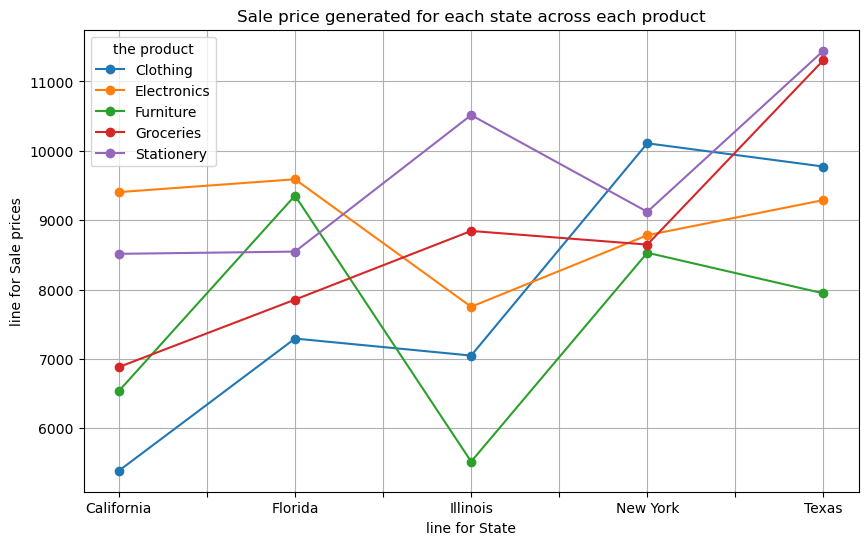

In [31]:
pivottable.plot(kind = 'line', marker = 'o', figsize = (10,6))
plt.xlabel('line for State')
plt.ylabel('line for Sale prices')
plt.title('Sale price generated for each state across each product')
plt.legend(title = 'the product')
plt.grid(True)
plt.show()

In [32]:
product_sale_by_day = df.groupby(['Product', 'Day'])['Total revenue'].sum().reset_index()
product_sale_by_day 

,Product,Day,Total revenue
0,Clothing,Friday,103547.18
1,Clothing,Monday,150996.32
2,Clothing,Saturday,156630.83
3,Clothing,Sunday,152264.25
4,Clothing,Thursday,173567.33
5,Clothing,Tuesday,149072.33
6,Clothing,Wednesday,168373.49
7,Electronics,Friday,181542.17
8,Electronics,Monday,228338.01
9,Electronics,Saturday,113691.05


In [33]:
pivottable = product_sale_by_day.pivot(index = 'Product', columns = 'Day', values = 'Total revenue').fillna(0)
pivottable

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Product,,,,,,,
Clothing,103547.18,150996.32,156630.83,152264.25,173567.33,149072.33,168373.49
Electronics,181542.17,228338.01,113691.05,99645.87,228828.81,192670.18,58744.73
Furniture,113562.98,160773.50,142257.67,81318.59,111756.85,205547.45,116406.92
Groceries,137177.05,212097.00,139447.37,79418.92,173511.75,201484.27,146279.61
Stationery,217939.01,76762.72,189776.92,244335.58,124797.57,160578.12,221624.81


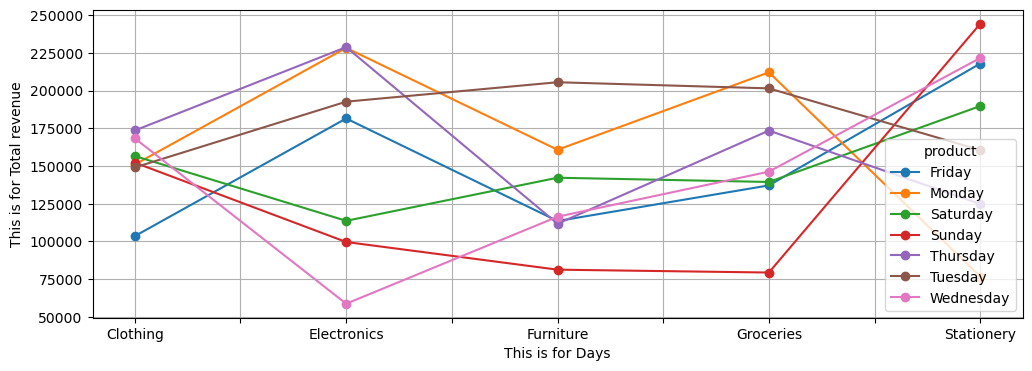

In [34]:
pivottable.plot(kind = 'line', marker = 'o', figsize = (12,4))
plt.xlabel('This is for Days')
plt.ylabel('This is for Total revenue')
plt.legend(title = 'product')
plt.grid(True)
plt.show()